In [2]:
import librosa
import numpy as np
import sys
import pickle
import time
import IPython.display as ipd
from codec import encode, decode
import scipy.signal as signal
from scipy.fftpack import fft, ifft, dct, idct
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
def load_cd_quality_audio(filename):
    audio, sr = librosa.load(filename, sr=44100, dtype='float_')
    max_int_value = 2**15 - 1
    audio *= max_int_value
    audio = audio.astype('int16')
    return audio
    
audio_signal = load_cd_quality_audio("taxman.wav")
sample_rate = 44100

audio_signal.shape

(7008248,)

In [3]:
def signalToNoise(original, decoded):
    original = original.astype('float_')
    decoded = decoded.astype('float_')
    diff = len(original) - len(decoded)
    
    if diff < 0:
        decoded = decoded[:diff]
    if diff > 0:
        decoded = np.append(decoded, np.zeros((diff,1)))
        
    signal = np.power(original, 2)
    noise = np.power(original-decoded, 2)
    
    signal = np.where(signal == 0, np.finfo(np.float32).eps, signal)
    noise = np.where(noise == 0, np.finfo(np.float32).eps, noise)
    
    return np.mean(np.log10(signal/noise)*10)

In [96]:
from PQMFB import *

# fb=np.sin(np.pi/(2*32)*(np.arange(int(1.5*32))+0.5))
# fb = np.concatenate((fb,np.flipud(fb)))
fb = np.sin(np.pi / 2 * \
               np.power(np.sin(np.pi / 512 * \
               np.arange(0.5, 512 + 0.5)), 2))
x = audio_signal[0:1000000]
y=PQMFBana(x,576,fb)
xr=PQMFBsyn(y,fb)

overlap= 0
Fa.shape= (576, 576, 0)
y[:,:,0]= [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [97]:
y.shape

(576, 1735)

In [98]:
ipd.Audio(xr, rate=sample_rate)

In [5]:
W = audio_signal[100000:100000+32]

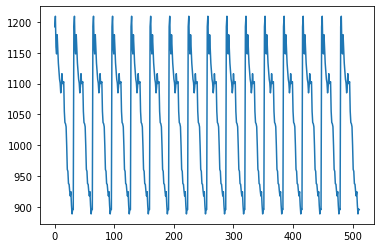

In [6]:
X = np.zeros(512)
for i in np.linspace(31,0,31-0+1).astype('int'):
    X[i] = W[31-i]
for i in np.linspace(32, 511, 511-32+1).astype('int'):
    X[i] = X[i-32]
    
plt.plot(X)

In [11]:
# X_freq = fft(X,512)
# Z_freq = X_freq*C
Z = np.convolve(X,C)
Z.shape

(1023,)

In [14]:
Y = np.zeros(64)
for i in range(0, 64):
    Y[i] = Z[i]*8 + np.sum(np.array([0,1,2,3,4,5,6,7])*64)
    
Y.shape

(64,)

In [15]:
M = np.zeros((32, 64))
for i in range(0, 32):
    for k in range(0, 64):
        M[i,k] = np.cos((2*i+1)*(k-16)*np.pi/64)

In [18]:
S = np.zeros((32, 64))

for i in range(0, 32):
    for k in range(0, 64):
        S[i] += np.convolve(M[i,k], Y[k])
        
S.shape

(32, 64)

In [9]:
C = np.array(
[  0.00000000e+00,  -4.77000000e-07,  -4.77000000e-07,  -4.77000000e-07,
  -4.77000000e-07,  -4.77000000e-07,  -4.77000000e-07,  -9.54000000e-07,
  -9.54000000e-07,  -9.54000000e-07,  -9.54000000e-07,  -1.43100000e-06,
  -1.43100000e-06,  -1.90700000e-06,  -1.90700000e-06,  -2.38400000e-06,
  -2.38400000e-06,  -2.86100000e-06,  -3.33800000e-06,  -3.33800000e-06,
  -3.81500000e-06,  -4.29200000e-06,  -4.76800000e-06,  -5.24500000e-06,
  -6.19900000e-06,  -6.67600000e-06,  -7.62900000e-06,  -8.10600000e-06,
  -9.06000000e-06,  -1.00140000e-05,  -1.14440000e-05,  -1.23980000e-05,
  -1.38280000e-05,  -1.47820000e-05,  -1.66890000e-05,  -1.81200000e-05,
  -1.95500000e-05,  -2.14580000e-05,  -2.33650000e-05,  -2.52720000e-05,
  -2.76570000e-05,  -3.00410000e-05,  -3.24250000e-05,  -3.48090000e-05,
  -3.76700000e-05,  -4.05310000e-05,  -4.33920000e-05,  -4.62530000e-05,
  -4.95910000e-05,  -5.29290000e-05,  -5.57900000e-05,  -5.96050000e-05,
  -6.29430000e-05,  -6.62800000e-05,  -7.00950000e-05,  -7.34330000e-05,
  -7.67710000e-05,  -8.05850000e-05,  -8.39230000e-05,  -8.72610000e-05,
  -9.05990000e-05,  -9.34600000e-05,  -9.63210000e-05,  -9.91820000e-05,
  -1.01566000e-04,  -1.03951000e-04,  -1.05858000e-04,  -1.07288000e-04,
  -1.08242000e-04,  -1.08719000e-04,  -1.08719000e-04,  -1.08242000e-04,
  -1.06812000e-04,  -1.05381000e-04,  -1.02520000e-04,  -9.91820000e-05,
  -9.53670000e-05,  -9.01220000e-05,  -8.44000000e-05,  -7.77240000e-05,
  -6.96180000e-05,  -6.05580000e-05,  -5.05450000e-05,  -3.95770000e-05,
  -2.71800000e-05,  -1.38280000e-05,   9.54000000e-07,   1.71660000e-05,
   3.43320000e-05,   5.29290000e-05,   7.29560000e-05,   9.39370000e-05,
   1.16348000e-04,   1.40190000e-04,   1.65462000e-04,   1.91212000e-04,
   2.18868000e-04,   2.47478000e-04,   2.77042000e-04,   3.07560000e-04,
   3.39031000e-04,   3.71456000e-04,   4.04358000e-04,   4.38213000e-04,
   4.72546000e-04,   5.07355000e-04,   5.42164000e-04,   5.76973000e-04,
   6.11782000e-04,   6.46591000e-04,   6.80923000e-04,   7.14302000e-04,
   7.47204000e-04,   7.79152000e-04,   8.09669000e-04,   8.38757000e-04,
   8.66413000e-04,   8.91685000e-04,   9.15051000e-04,   9.35555000e-04,
   9.54151000e-04,   9.68933000e-04,   9.80854000e-04,   9.89437000e-04,
   9.94205000e-04,   9.95159000e-04,   9.91821000e-04,   9.83715000e-04,
   9.71317000e-04,   9.53674000e-04,   9.30786000e-04,   9.02653000e-04,
   8.68797000e-04,   8.29220000e-04,   7.83920000e-04,   7.31945000e-04,
   6.74248000e-04,   6.10352000e-04,   5.39303000e-04,   4.62532000e-04,
   3.78609000e-04,   2.88486000e-04,   1.91689000e-04,   8.82150000e-05,
  -2.14580000e-05,  -1.37329000e-04,  -2.59876000e-04,  -3.88145000e-04,
  -5.22137000e-04,  -6.61850000e-04,  -8.06808000e-04,  -9.56535000e-04,
  -1.11103100e-03,  -1.26981700e-03,  -1.43241900e-03,  -1.59788100e-03,
  -1.76668200e-03,  -1.93738900e-03,  -2.11000400e-03,  -2.28309600e-03,
  -2.45714200e-03,  -2.63071100e-03,  -2.80332600e-03,  -2.97403300e-03,
  -3.14188000e-03,  -3.30686600e-03,  -3.46708300e-03,  -3.62253200e-03,
  -3.77178200e-03,  -3.91435600e-03,  -4.04882400e-03,  -4.17470900e-03,
  -4.29058100e-03,  -4.39596200e-03,  -4.48989900e-03,  -4.57048400e-03,
  -4.63819500e-03,  -4.69112400e-03,  -4.72831700e-03,  -4.74882100e-03,
  -4.75215900e-03,  -4.73737700e-03,  -4.70304500e-03,  -4.64916200e-03,
  -4.57382200e-03,  -4.47702400e-03,  -4.35781500e-03,  -4.21524000e-03,
  -4.04930100e-03,  -3.85856600e-03,  -3.64303600e-03,  -3.40175600e-03,
  -3.13472700e-03,  -2.84147300e-03,  -2.52151500e-03,  -2.17485400e-03,
  -1.80053700e-03,  -1.39951700e-03,  -9.71317000e-04,  -5.15938000e-04,
  -3.33790000e-05,   4.75883000e-04,   1.01184800e-03,   1.57356300e-03,
   2.16150300e-03,   2.77423900e-03,   3.41129300e-03,   4.07218900e-03,
   4.75645100e-03,   5.46217000e-03,   6.18934600e-03,   6.93702700e-03,
   7.70330400e-03,   8.48722500e-03,   9.28783400e-03,   1.01037030e-02,
   1.09333990e-02,   1.17750170e-02,   1.26276020e-02,   1.34892460e-02,
   1.43585210e-02,   1.52335170e-02,   1.61128040e-02,   1.69944760e-02,
   1.78761480e-02,   1.87568660e-02,   1.96342470e-02,   2.05068590e-02,
   2.13723180e-02,   2.22287180e-02,   2.30741500e-02,   2.39071850e-02,
   2.47254370e-02,   2.55270000e-02,   2.63109210e-02,   2.70738600e-02,
   2.78153420e-02,   2.85329820e-02,   2.92248730e-02,   2.98900600e-02,
   3.05266380e-02,   3.11326980e-02,   3.17068100e-02,   3.22480200e-02,
   3.27548980e-02,   3.32255360e-02,   3.36599350e-02,   3.40557100e-02,
   3.44128610e-02,   3.47304340e-02,   3.50070000e-02,   3.52420810e-02,
   3.54352000e-02,   3.55863570e-02,   3.56941220e-02,   3.57589720e-02,
   3.57809070e-02,   3.57589720e-02,   3.56941220e-02,   3.55863570e-02,
   3.54352000e-02,   3.52420810e-02,   3.50070000e-02,   3.47304340e-02,
   3.44128610e-02,   3.40557100e-02,   3.36599350e-02,   3.32255360e-02,
   3.27548980e-02,   3.22480200e-02,   3.17068100e-02,   3.11326980e-02,
   3.05266380e-02,   2.98900600e-02,   2.92248730e-02,   2.85329820e-02,
   2.78153420e-02,   2.70738600e-02,   2.63109210e-02,   2.55270000e-02,
   2.47254370e-02,   2.39071850e-02,   2.30741500e-02,   2.22287180e-02,
   2.13723180e-02,   2.05068590e-02,   1.96342470e-02,   1.87568660e-02,
   1.78761480e-02,   1.69944760e-02,   1.61128040e-02,   1.52335170e-02,
   1.43585210e-02,   1.34892460e-02,   1.26276020e-02,   1.17750170e-02,
   1.09333990e-02,   1.01037030e-02,   9.28783400e-03,   8.48722500e-03,
   7.70330400e-03,   6.93702700e-03,   6.18934600e-03,   5.46217000e-03,
   4.75645100e-03,   4.07218900e-03,   3.41129300e-03,   2.77423900e-03,
   2.16150300e-03,   1.57356300e-03,   1.01184800e-03,   4.75883000e-04,
  -3.33790000e-05,  -5.15938000e-04,  -9.71317000e-04,  -1.39951700e-03,
  -1.80053700e-03,  -2.17485400e-03,  -2.52151500e-03,  -2.84147300e-03,
  -3.13472700e-03,  -3.40175600e-03,  -3.64303600e-03,  -3.85856600e-03,
  -4.04930100e-03,  -4.21524000e-03,  -4.35781500e-03,  -4.47702400e-03,
  -4.57382200e-03,  -4.64916200e-03,  -4.70304500e-03,  -4.73737700e-03,
  -4.75215900e-03,  -4.74882100e-03,  -4.72831700e-03,  -4.69112400e-03,
  -4.63819500e-03,  -4.57048400e-03,  -4.48989900e-03,  -4.39596200e-03,
  -4.29058100e-03,  -4.17470900e-03,  -4.04882400e-03,  -3.91435600e-03,
  -3.77178200e-03,  -3.62253200e-03,  -3.46708300e-03,  -3.30686600e-03,
  -3.14188000e-03,  -2.97403300e-03,  -2.80332600e-03,  -2.63071100e-03,
  -2.45714200e-03,  -2.28309600e-03,  -2.11000400e-03,  -1.93738900e-03,
  -1.76668200e-03,  -1.59788100e-03,  -1.43241900e-03,  -1.26981700e-03,
  -1.11103100e-03,  -9.56535000e-04,  -8.06808000e-04,  -6.61850000e-04,
  -5.22137000e-04,  -3.88145000e-04,  -2.59876000e-04,  -1.37329000e-04,
  -2.14580000e-05,   8.82150000e-05,   1.91689000e-04,   2.88486000e-04,
   3.78609000e-04,   4.62532000e-04,   5.39303000e-04,   6.10352000e-04,
   6.74248000e-04,   7.31945000e-04,   7.83920000e-04,   8.29220000e-04,
   8.68797000e-04,   9.02653000e-04,   9.30786000e-04,   9.53674000e-04,
   9.71317000e-04,   9.83715000e-04,   9.91821000e-04,   9.95159000e-04,
   9.94205000e-04,   9.89437000e-04,   9.80854000e-04,   9.68933000e-04,
   9.54151000e-04,   9.35555000e-04,   9.15051000e-04,   8.91685000e-04,
   8.66413000e-04,   8.38757000e-04,   8.09669000e-04,   7.79152000e-04,
   7.47204000e-04,   7.14302000e-04,   6.80923000e-04,   6.46591000e-04,
   6.11782000e-04,   5.76973000e-04,   5.42164000e-04,   5.07355000e-04,
   4.72546000e-04,   4.38213000e-04,   4.04358000e-04,   3.71456000e-04,
   3.39031000e-04,   3.07560000e-04,   2.77042000e-04,   2.47478000e-04,
   2.18868000e-04,   1.91212000e-04,   1.65462000e-04,   1.40190000e-04,
   1.16348000e-04,   9.39370000e-05,   7.29560000e-05,   5.29290000e-05,
   3.43320000e-05,   1.71660000e-05,   9.54000000e-07,  -1.38280000e-05,
  -2.71800000e-05,  -3.95770000e-05,  -5.05450000e-05,  -6.05580000e-05,
  -6.96180000e-05,  -7.77240000e-05,  -8.44000000e-05,  -9.01220000e-05,
  -9.53670000e-05,  -9.91820000e-05,  -1.02520000e-04,  -1.05381000e-04,
  -1.06812000e-04,  -1.08242000e-04,  -1.08719000e-04,  -1.08719000e-04,
  -1.08242000e-04,  -1.07288000e-04,  -1.05858000e-04,  -1.03951000e-04,
  -1.01566000e-04,  -9.91820000e-05,  -9.63210000e-05,  -9.34600000e-05,
  -9.05990000e-05,  -8.72610000e-05,  -8.39230000e-05,  -8.05850000e-05,
  -7.67710000e-05,  -7.34330000e-05,  -7.00950000e-05,  -6.62800000e-05,
  -6.29430000e-05,  -5.96050000e-05,  -5.57900000e-05,  -5.29290000e-05,
  -4.95910000e-05,  -4.62530000e-05,  -4.33920000e-05,  -4.05310000e-05,
  -3.76700000e-05,  -3.48090000e-05,  -3.24250000e-05,  -3.00410000e-05,
  -2.76570000e-05,  -2.52720000e-05,  -2.33650000e-05,  -2.14580000e-05,
  -1.95500000e-05,  -1.81200000e-05,  -1.66890000e-05,  -1.47820000e-05,
  -1.38280000e-05,  -1.23980000e-05,  -1.14440000e-05,  -1.00140000e-05,
  -9.06000000e-06,  -8.10600000e-06,  -7.62900000e-06,  -6.67600000e-06,
  -6.19900000e-06,  -5.24500000e-06,  -4.76800000e-06,  -4.29200000e-06,
  -3.81500000e-06,  -3.33800000e-06,  -3.33800000e-06,  -2.86100000e-06,
  -2.38400000e-06,  -2.38400000e-06,  -1.90700000e-06,  -1.90700000e-06,
  -1.43100000e-06,  -1.43100000e-06,  -9.54000000e-07,  -9.54000000e-07,
  -9.54000000e-07,  -9.54000000e-07,  -4.77000000e-07,  -4.77000000e-07,
  -4.77000000e-07,  -4.77000000e-07,  -4.77000000e-07,  -4.77000000e-07])